In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [2]:
(imagenes_entrenamiento, etiquetas_entrenamiento), (imagenes_prueba, etiquetas_prueba) = mnist.load_data()

In [3]:
imagenes_entrenamiento = imagenes_entrenamiento / 255.0
imagenes_prueba = imagenes_prueba / 255.0

In [5]:
etiquetas_entrenamiento[0]

np.uint8(5)

In [6]:
etiquetas_entrenamiento = to_categorical(etiquetas_entrenamiento)
etiquetas_prueba = to_categorical(etiquetas_prueba)

In [7]:
etiquetas_entrenamiento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [9]:
modelo = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Dev\Curso_data_y_machine\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
modelo.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
modelo.fit(imagenes_entrenamiento,
            etiquetas_entrenamiento,
            epochs = 5,
            validation_data = (imagenes_prueba, etiquetas_prueba))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8775 - loss: 0.4350 - val_accuracy: 0.9566 - val_loss: 0.1480
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9657 - loss: 0.1186 - val_accuracy: 0.9692 - val_loss: 0.1029
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9753 - loss: 0.0811 - val_accuracy: 0.9739 - val_loss: 0.0835
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9824 - loss: 0.0587 - val_accuracy: 0.9744 - val_loss: 0.0808
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9866 - loss: 0.0449 - val_accuracy: 0.9772 - val_loss: 0.0698


In [12]:
predicciones = modelo.predict(imagenes_prueba)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
def ver_imagen(array_predicciones, etiqueta_real, img):
    etiqueta_real, img = etiqueta_real.argmax(), img.squeeze()
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    etiqueta_predicha = np.argmax(array_predicciones)

    if etiqueta_predicha == etiqueta_real:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f'Pred: {etiqueta_predicha} Real: {etiqueta_real}', color=color)

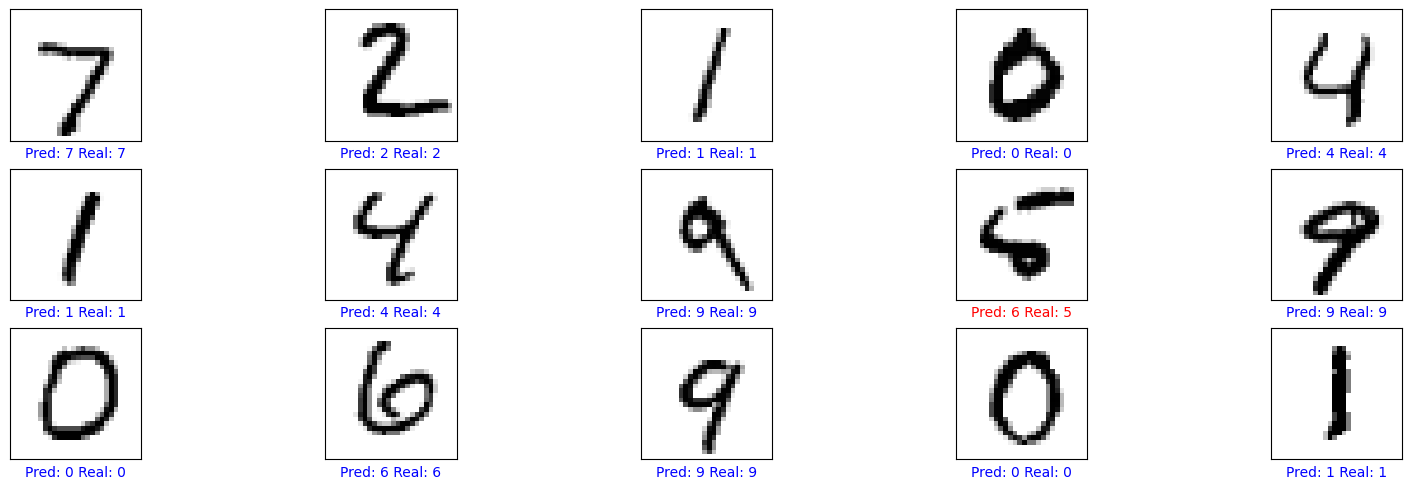

In [18]:
filas = 5
columnas = 3
numero_imagenes = filas * columnas
plt.figure(figsize=(2*2*filas, 2*filas))

for i in range(numero_imagenes):
    plt.subplot(filas, 2*filas, 2*i+1)
    ver_imagen(predicciones[i], etiquetas_prueba[i], imagenes_prueba[i])